<a href="https://colab.research.google.com/github/Ritam646/CodeAlpha_Disease_Prediction/blob/main/CodeAlpha_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
from google.colab import files
from sklearn.utils.class_weight import compute_class_weight

In [29]:
heart_df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_Internship/heart.csv', header=None, na_values='?')
heart_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_df.columns = heart_columns
heart_df = heart_df.dropna()
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target'].apply(lambda x: 1 if x > 0 else 0)

In [30]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_Internship/diabetes.csv')
X_diabetes = diabetes_df.drop('Outcome', axis=1)
y_diabetes = diabetes_df['Outcome']
X_diabetes = X_diabetes.replace(0, X_diabetes.median())
diabetes_weights = compute_class_weight('balanced', classes=np.unique(y_diabetes), y=y_diabetes)

In [31]:
breast_columns = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
                  'marginal_adhesion', 'single_cell_size', 'bare_nuclei', 'bland_chromatin',
                  'normal_nucleoli', 'mitoses', 'target']
breast_df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_Internship/breast_cancer.csv', header=None, na_values='?', names=breast_columns)
breast_df = breast_df.drop('id', axis=1).dropna()
X_breast = breast_df.drop('target', axis=1)
y_breast = breast_df['target'].apply(lambda x: 1 if x != 2 else 0)


In [32]:
datasets = {'Heart': (X_heart, y_heart), 'Diabetes': (X_diabetes, y_diabetes), 'Breast Cancer': (X_breast, y_breast)}
scaler = StandardScaler()
results = {}


In [33]:
for name, (X, y) in datasets.items():
    if X.empty or y.empty:
        print(f"Error: {name} dataset is empty or not loaded correctly.")
        continue
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    models = {
        'SVM': SVC(kernel='rbf', random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
    }
    if name == 'Diabetes':
        for model in models.values():
            if hasattr(model, 'class_weight'):
                model.set_params(class_weight=dict(zip(np.unique(y_diabetes), diabetes_weights)))

    results[name] = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name][model_name] = accuracy
        print(f"{name} - {model_name} Accuracy: {accuracy:.3f}")
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} - {model_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f'/content/drive/MyDrive/CodeAlpha_Internship/{name}_{model_name}_confusion_matrix.png')
        plt.close()


Heart - SVM Accuracy: 0.883
Heart - Logistic Regression Accuracy: 0.867
Heart - Random Forest Accuracy: 0.883
Heart - XGBoost Accuracy: 0.833
Diabetes - SVM Accuracy: 0.727
Diabetes - Logistic Regression Accuracy: 0.695
Diabetes - Random Forest Accuracy: 0.760
Diabetes - XGBoost Accuracy: 0.747
Breast Cancer - SVM Accuracy: 0.964
Breast Cancer - Logistic Regression Accuracy: 0.956
Breast Cancer - Random Forest Accuracy: 0.949
Breast Cancer - XGBoost Accuracy: 0.942


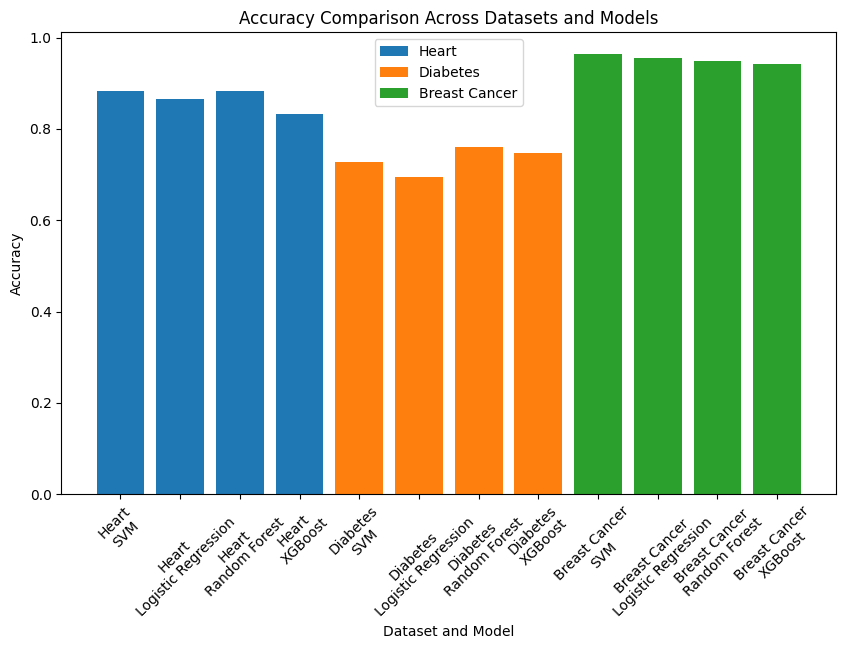

In [34]:
plt.figure(figsize=(10,6))
for dataset, accuracies in results.items():
    plt.bar([f'{dataset}\n{alg}' for alg in accuracies.keys()], accuracies.values(), label=dataset)
plt.title('Accuracy Comparison Across Datasets and Models')
plt.xlabel('Dataset and Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/CodeAlpha_Internship/accuracy_comparison.png')
plt.show()

In [35]:
best_breast_model = SVC(kernel='rbf', random_state=42)
best_breast_model.fit(scaler.fit_transform(X_breast), y_breast)
joblib.dump(best_breast_model, '/content/drive/MyDrive/CodeAlpha_Internship/breast_model.pkl')


['/content/drive/MyDrive/CodeAlpha_Internship/breast_model.pkl']

In [36]:
best_heart_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_heart_model.fit(scaler.fit_transform(X_heart), y_heart)
joblib.dump(best_heart_model, '/content/drive/MyDrive/CodeAlpha_Internship/heart_model.pkl')

['/content/drive/MyDrive/CodeAlpha_Internship/heart_model.pkl']

In [37]:
best_diabetes_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_diabetes_model.fit(scaler.fit_transform(X_diabetes), y_diabetes)
joblib.dump(best_diabetes_model, '/content/drive/MyDrive/CodeAlpha_Internship/diabetes_model.pkl')

['/content/drive/MyDrive/CodeAlpha_Internship/diabetes_model.pkl']